In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
conn = sqlite3.connect('/Users/karinaharutyunyan/Downloads/movie.sqlite')
cur= conn.cursor()

In [3]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
cur.execute(query)
cur.fetchall()

[('IMDB',), ('earning',), ('genre',)]

In [4]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
pd.read_sql(query, conn)

,name
0,IMDB
1,earning
2,genre


In [5]:
query = "SELECT * FROM IMDB LIMIT 5;"
pd.read_sql(query, conn)

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [6]:
#all movies with budget more than 25000000
query = "SELECT Title FROM IMDB WHERE Budget > 25000000;"
pd.read_sql(query, conn)

,Title
0,Argo (2012)
1,Arrival (2016)
2,Big Hero 6 (2014)
3,Bridge of Spies (2015)
4,Captain America: Civil War (2016)
...,...
65,True Grit (2010)
66,Wreck-It Ralph (2012)
67,X-Men: Days of Future Past (2014)
68,X-Men: First Class (2011)


In [7]:
# avearge rating of movies that run for 2 hours
query= "SELECT AVG(Rating) FROM IMDB WHERE Runtime = '120 min';"
pd.read_sql(query, conn)

,AVG(Rating)
0,7.833333


In [40]:
# top 10 movies with highest votes 
query= "SELECT IMDB.Title, IMDB.Rating, IMDB.TotalVotes FROM IMDB ORDER BY IMDB.TotalVotes DESC LIMIT 10;"
top10_highest_votes=pd.read_sql(query, conn)
top10_highest_votes

,Title,Rating,TotalVotes
0,Inception (2010),8.8,1609713
1,The Dark Knight Rises (2012),8.4,1240780
2,Interstellar (2014),8.6,1075163
3,Django Unchained (2012),8.4,1056822
4,The Avengers (2012),8.1,1056773
5,The Wolf of Wall Street (2013),8.2,881984
6,Shutter Island (2010),8.1,871391
7,Guardians of the Galaxy (2014),8.1,778220
8,Star Wars: The Force Awakens (2015),8.1,676732
9,The Hobbit: An Unexpected Journey (2012),7.9,675678


In [9]:
query = "SELECT * FROM genre LIMIT 5;"
pd.read_sql(query, conn)

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama


In [10]:
#all movies their rating and their genre
query= "SELECT IMDB.Movie_id, IMDB.Title, IMDB.Rating, genre.genre FROM IMDB INNER JOIN genre ON IMDB.Movie_id=genre.Movie_id ORDER BY IMDB.Movie_id"
pd.read_sql(query, conn)

,Movie_id,Title,Rating,genre
0,10015,Disconnect (2012),7.6,
1,10015,Disconnect (2012),7.6,Drama
2,10015,Disconnect (2012),7.6,Thriller
3,10023,Wreck-It Ralph (2012),7.7,Adventure
4,10023,Wreck-It Ralph (2012),7.7,Animation
...,...,...,...,...
346,49518,Flipped (2010),7.7,Drama
347,49518,Flipped (2010),7.7,Romance
348,49590,Captain America: Civil War (2016),7.9,Action
349,49590,Captain America: Civil War (2016),7.9,Adventure


In [11]:
query = "SELECT * FROM earning LIMIT 5;"
pd.read_sql(query, conn)

,Movie_id,Domestic,Worldwide
0,36809,56671993,187733202.0
1,30114,18335230,60738797.0
2,37367,35014192,39187783.0
3,49473,15322921,87100449.0
4,14867,6739492,19839492.0


In [26]:
#top 10 movies with the highest domestic earnings
query= "SELECT IMDB.Movie_id, IMDB.Title, earning.Domestic FROM IMDB INNER JOIN earning ON IMDB.Movie_id=earning.Movie_id ORDER BY earning.Domestic DESC Limit 10"
top10_highest_domestic=pd.read_sql(query, conn)
top10_highest_domestic

,Movie_id,Title,Domestic
0,38626,Star Wars: The Force Awakens (2015),936662225
1,10454,The Avengers (2012),623357910
2,44253,Rogue One (2016),532177324
3,29419,The Dark Knight Rises (2012),448139099
4,41963,The Hunger Games: Catching Fire (2013),424668047
5,40832,Toy Story 3 (2010),415004880
6,49590,Captain America: Civil War (2016),408084349
7,18506,Deadpool (2016),363070709
8,42732,Inside Out (2015),356461711
9,32217,Zootopia (2016),341268248


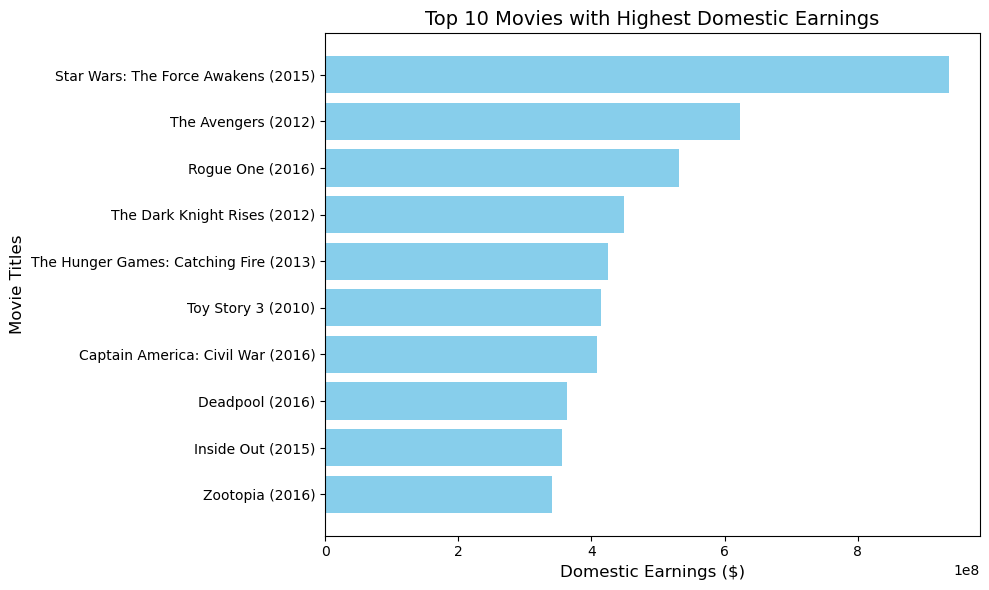

In [27]:
#Histogram shows distribution of top 1o movies with Highest Domestic Earnings
top10_highest_domestic = top10_highest_domestic.sort_values("Domestic", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top10_highest_domestic["Title"], top10_highest_domestic["Domestic"], color="skyblue")
plt.xlabel("Domestic Earnings ($)", fontsize=12)
plt.ylabel("Movie Titles", fontsize=12)
plt.title("Top 10 Movies with Highest Domestic Earnings", fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [28]:
#top 10 movies with the highest worldwide earnings
query= "SELECT IMDB.Movie_id, IMDB.Title, earning.Worldwide FROM IMDB INNER JOIN earning ON IMDB.Movie_id=earning.Movie_id ORDER BY earning.Worldwide DESC Limit 10"
top10_highest_worldwide=pd.read_sql(query, conn)
top10_highest_worldwide

,Movie_id,Title,Worldwide
0,38626,Star Wars: The Force Awakens (2015),2.068224e+09
1,10454,The Avengers (2012),1.518813e+09
2,49590,Captain America: Civil War (2016),1.153304e+09
3,47323,Skyfall (2012),1.108561e+09
4,29419,The Dark Knight Rises (2012),1.084939e+09
5,40832,Toy Story 3 (2010),1.066970e+09
6,44253,Rogue One (2016),1.056057e+09
7,32217,Zootopia (2016),1.023784e+09
8,41835,The Hobbit: An Unexpected Journey (2012),1.021104e+09
9,21411,Harry Potter and the Deathly Hallows: Part 1 (...,9.602833e+08


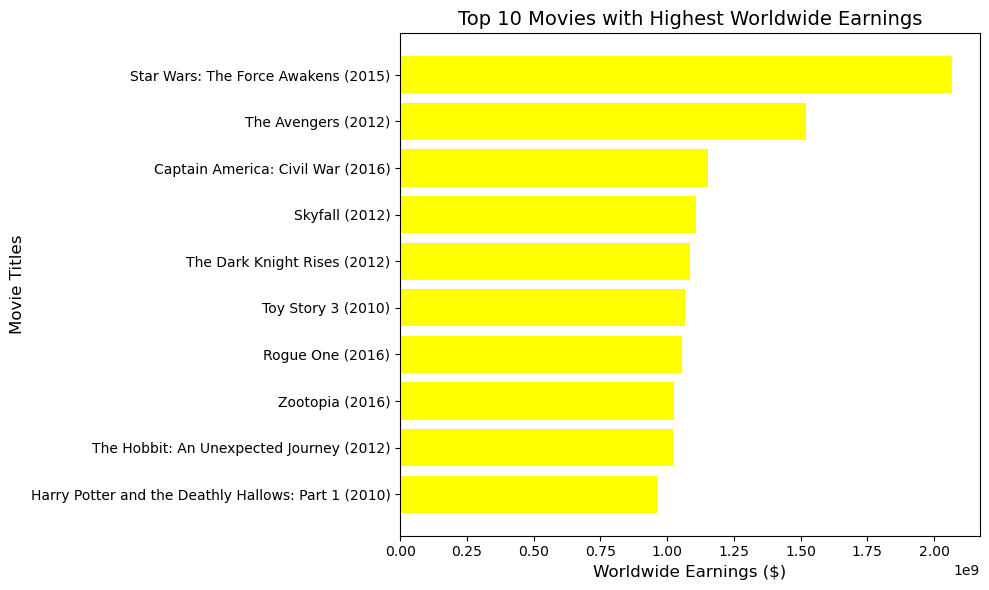

In [30]:
#Bar chart shows distribution of top 1o movies with Highest Worldwide Earnings

top10_highest_worldwide = top10_highest_worldwide.sort_values("Worldwide", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top10_highest_worldwide["Title"], top10_highest_worldwide["Worldwide"], color="yellow")
plt.xlabel("Worldwide Earnings ($)", fontsize=12)
plt.ylabel("Movie Titles", fontsize=12)
plt.title("Top 10 Movies with Highest Worldwide Earnings", fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [14]:
#average rating of movies by genre
query="SELECT genre.genre, AVG(IMDB.Rating) AS average_rating FROM IMDB JOIN genre ON genre.Movie_id = IMDB.Movie_id GROUP BY genre.genre ORDER BY average_rating DESC"
output = pd.read_sql(query, conn)
output

,genre,average_rating
0,Music,8.233333
1,Western,8.000000
2,Sci-Fi,7.994444
3,History,7.950000
4,Mystery,7.914286
5,Animation,7.900000
6,Adventure,7.895349
7,,7.890244
8,Action,7.875758
9,Crime,7.872727


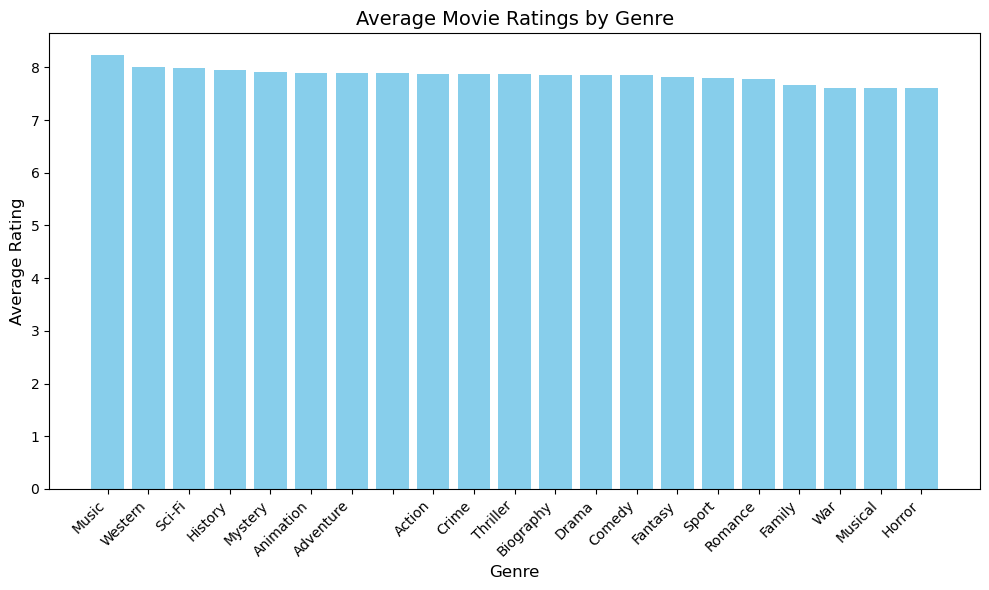

In [31]:
output = output.sort_values("average_rating", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(output["genre"], output["average_rating"], color="skyblue")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Movie Ratings by Genre", fontsize=14)
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()

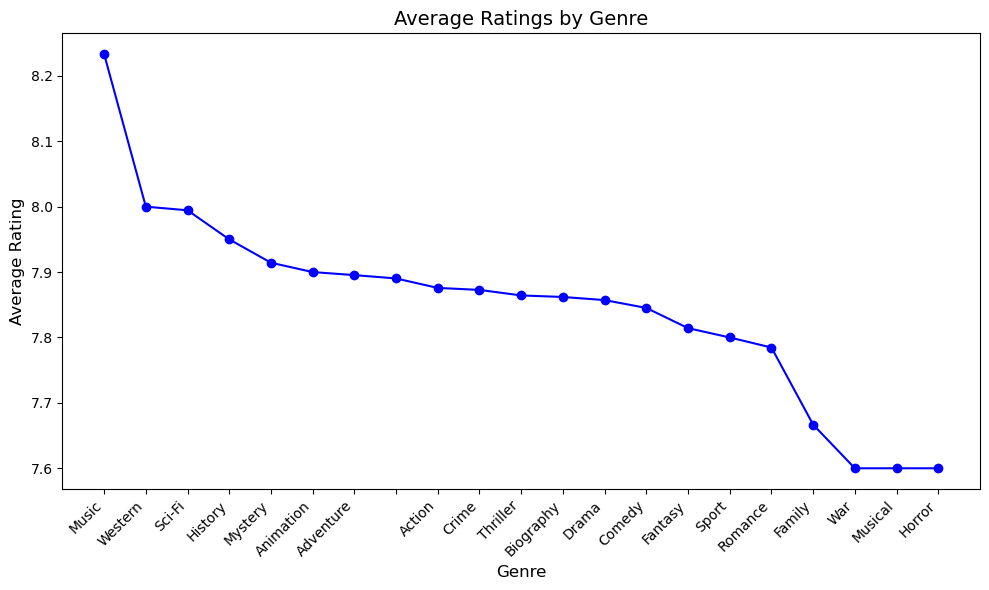

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(output["genre"], output["average_rating"], marker="o", linestyle="-", color="b")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Ratings by Genre", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [15]:
#highest domestice earning genres
query="SELECT genre.genre, SUM(earning.Domestic) AS Total_Dom_Earnings FROM genre INNER JOIN earning ON genre.Movie_id = earning.Movie_id GROUP BY genre.genre ORDER BY Total_Dom_Earnings DESC LIMIT 10;"
top10_earning=pd.read_sql(query, conn)
top10_earning

,genre,Total_Dom_Earnings
0,Adventure,10062990463
1,Action,8017718139
2,Drama,5597022138
3,Sci-Fi,4330953978
4,Comedy,3389144815
5,,3313099949
6,Animation,2927485608
7,Fantasy,2098797839
8,Thriller,1909753473
9,Biography,1701972961


In [16]:
#highest worldwide earning genres
query="SELECT genre.genre, SUM(earning.Worldwide) AS Total_World_Earnings FROM genre INNER JOIN earning ON genre.Movie_id = earning.Movie_id GROUP BY genre.genre ORDER BY Total_World_Earnings DESC LIMIT 10;"
top10_earning_world=pd.read_sql(query, conn)
top10_earning_world

,genre,Total_World_Earnings
0,Adventure,2.662983e+10
1,Action,1.986750e+10
2,Drama,1.301904e+10
3,Sci-Fi,1.115745e+10
4,Comedy,8.585548e+09
5,,8.221328e+09
6,Animation,7.608724e+09
7,Fantasy,5.923915e+09
8,Thriller,4.971838e+09
9,Biography,3.621331e+09


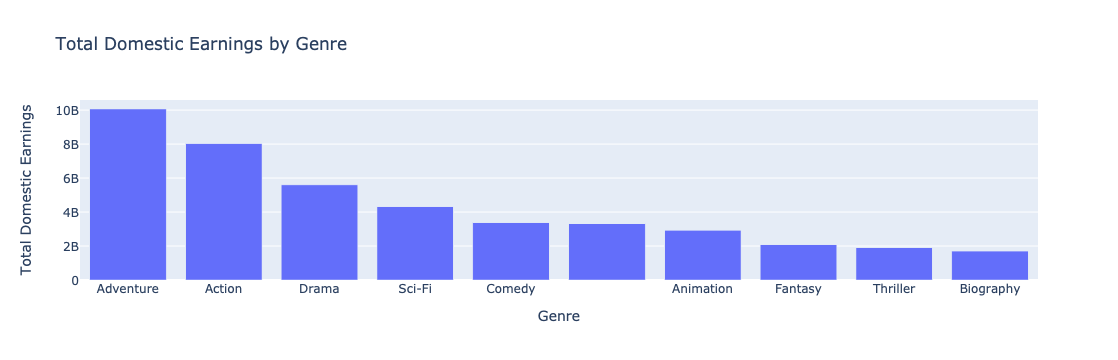

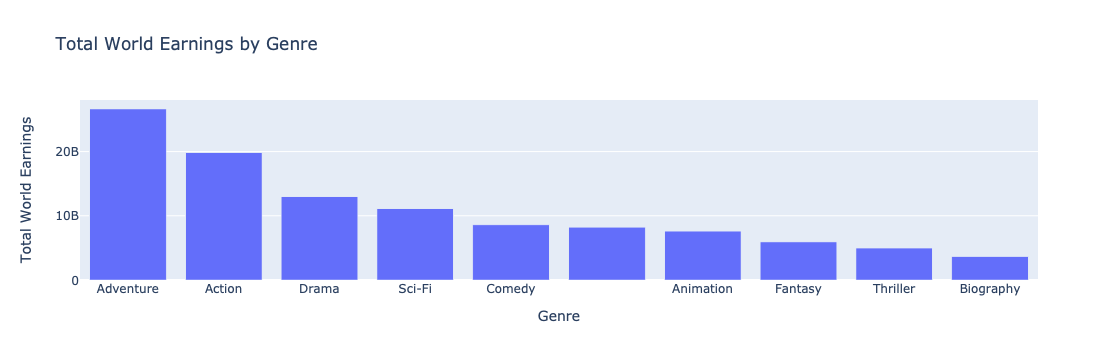

In [59]:
#two bar charts showing releationship between earning and genre both for domestic and worldwide earnings
fig1 = px.bar(top10_earning, x="genre", y="Total_Dom_Earnings", 
              title="Total Domestic Earnings by Genre", 
              labels={"genre": "Genre", "Total_Dom_Earnings": "Total Domestic Earnings"})

fig2 = px.bar(top10_earning_world, x="genre", y="Total_World_Earnings", 
              title="Total World Earnings by Genre", 
              labels={"genre": "Genre", "Total_World_Earnings": "Total World Earnings"})

fig1.show()
fig2.show()

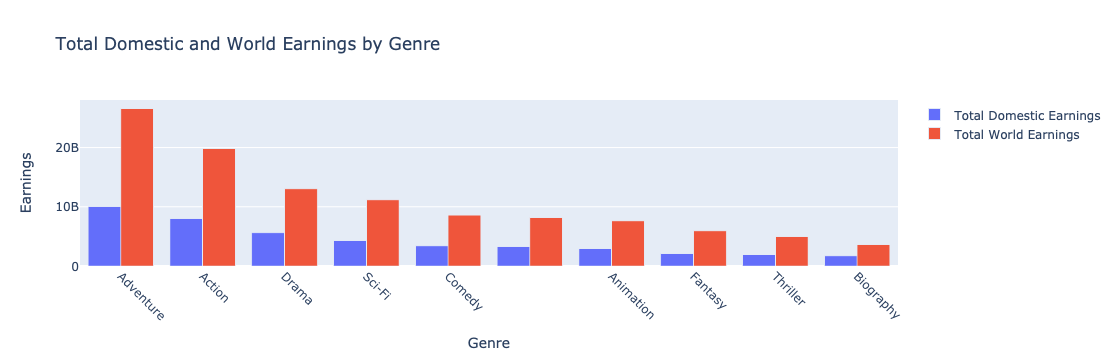

In [62]:
#I combined two plots on one to visually represent the difference between domestic and worldwide earnings

fig3 = go.Figure()

fig3.add_trace(go.Bar( x=fig1.data[0].x, y=fig1.data[0].y, name='Total Domestic Earnings'))

fig3.add_trace(go.Bar(x=fig2.data[0].x,y=fig2.data[0].y, name='Total World Earnings'))

fig3.update_layout(title="Total Domestic and World Earnings by Genre", xaxis=dict(title="Genre"), yaxis=dict(title="Earnings"), barmode='group', xaxis_tickangle=45)

fig3.show()

In [17]:
#this query shows whether high-earning movies tend to have higher ratings on average
query ="SELECT CASE WHEN earning.Domestic > (SELECT AVG(Domestic) FROM earning) THEN 'High Earnings' ELSE 'Low Earnings'END AS Earning_Category, AVG(IMDB.Rating) AS Avg_Rating FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id GROUP BY Earning_Category ORDER BY Avg_Rating DESC;"
high_earning_rating=pd.read_sql(query, conn)
high_earning_rating

,Earning_Category,Avg_Rating
0,High Earnings,7.947727
1,Low Earnings,7.828767


In [18]:
#genres with the lowest avarage rating
query = "SELECT genre.genre, AVG(IMDB.Rating) AS Avg_Rating FROM genre INNER JOIN IMDB ON genre.Movie_id = IMDB.Movie_id GROUP BY genre.genre ORDER BY Avg_Rating ASC LIMIT 10;"
lowest_rating_genre=pd.read_sql(query, conn)
lowest_rating_genre

,genre,Avg_Rating
0,Horror,7.600000
1,Musical,7.600000
2,War,7.600000
3,Family,7.666667
4,Romance,7.784615
5,Sport,7.800000
6,Fantasy,7.814286
7,Comedy,7.845161
8,Drama,7.857143
9,Biography,7.861905


In [19]:
#genres with the highest avarage rating
query = "SELECT genre.genre, AVG(IMDB.Rating) AS Avg_Rating FROM genre INNER JOIN IMDB ON genre.Movie_id = IMDB.Movie_id GROUP BY genre.genre ORDER BY Avg_Rating DESC LIMIT 10;"
highest_rating_genre=pd.read_sql(query, conn)
highest_rating_genre

,genre,Avg_Rating
0,Music,8.233333
1,Western,8.000000
2,Sci-Fi,7.994444
3,History,7.950000
4,Mystery,7.914286
5,Animation,7.900000
6,Adventure,7.895349
7,,7.890244
8,Action,7.875758
9,Crime,7.872727


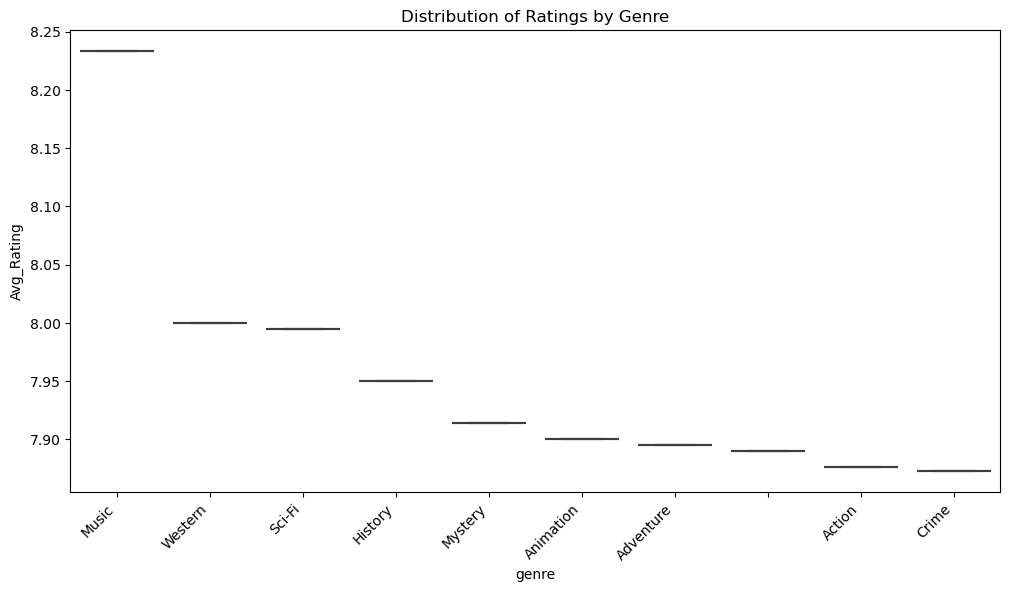

In [35]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="Avg_Rating", data=highest_rating_genre) 
plt.title("Distribution of Ratings by Genre")
plt.xticks(rotation=45, ha="right")
plt.show()

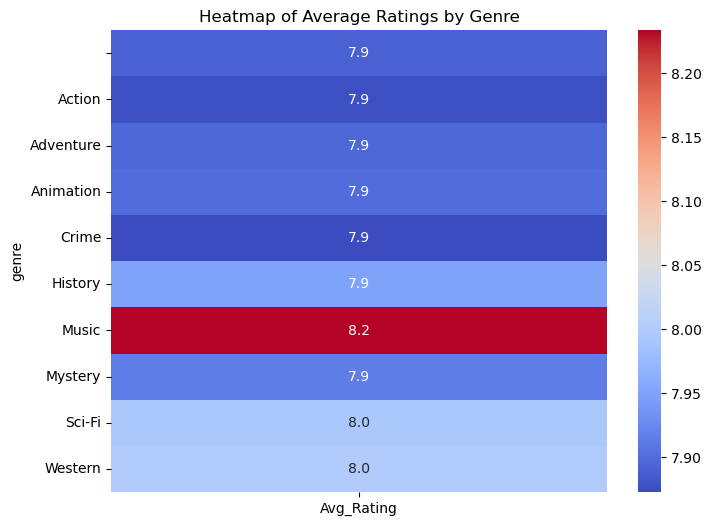

In [36]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(highest_rating_genre.pivot_table(index="genre", values="Avg_Rating"), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Heatmap of Average Ratings by Genre")
plt.show()

In [20]:
#genres with high rating but relatively low earnings
query = "SELECT genre.genre, AVG(IMDB.Rating) AS Avg_Rating, AVG(earning.Domestic) AS Avg_Earnings FROM genre INNER JOIN IMDB ON genre.Movie_id = IMDB.Movie_id INNER JOIN earning ON genre.Movie_id = earning.Movie_id GROUP BY genre.genre HAVING AVG(IMDB.Rating) > 7.87 AND AVG(earning.Domestic) < (SELECT AVG(Domestic) FROM earning) ORDER BY Avg_Rating DESC;"
high_rating_low_earning= pd.read_sql(query, conn)
high_rating_low_earning

,genre,Avg_Rating,Avg_Earnings
0,Music,8.233333,5.581031e+07
1,History,7.950000,9.530599e+07
2,,7.890244,8.080732e+07
3,Crime,7.872727,6.979731e+07


In [21]:
# the movies that earned the most relative to their production costs
query="SELECT IMDB.Title, IMDB.Budget,earning.Domestic + earning.Worldwide AS All_Earnings, (earning.Domestic + earning.Worldwide) / IMDB.Budget AS Profit_Ratio FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id WHERE IMDB.Budget > 0 ORDER BY Profit_Ratio DESC LIMIT 10;"
high_profit=pd.read_sql(query, conn)
high_profit

,Title,Budget,All_Earnings,Profit_Ratio
0,The King's Speech (2010),15000000.0,5.496647e+08,36.644313
1,The Fault in Our Stars (2014),12000000.0,4.320392e+08,36.003265
2,Black Swan (2010),13000000.0,4.363527e+08,33.565594
3,The Imitation Game (2014),14000000.0,3.246814e+08,23.191528
4,La La Land (2016),30000000.0,5.967715e+08,19.892383
5,Deadpool (2016),58000000.0,1.146184e+09,19.761788
6,Whiplash (2014),3300000.0,6.207404e+07,18.810315
7,Silver Linings Playbook (2012),21000000.0,3.685054e+08,17.547877
8,Boyhood (2014),4000000.0,6.984756e+07,17.461890
9,Dallas Buyers Club (2013),5000000.0,8.249657e+07,16.499314


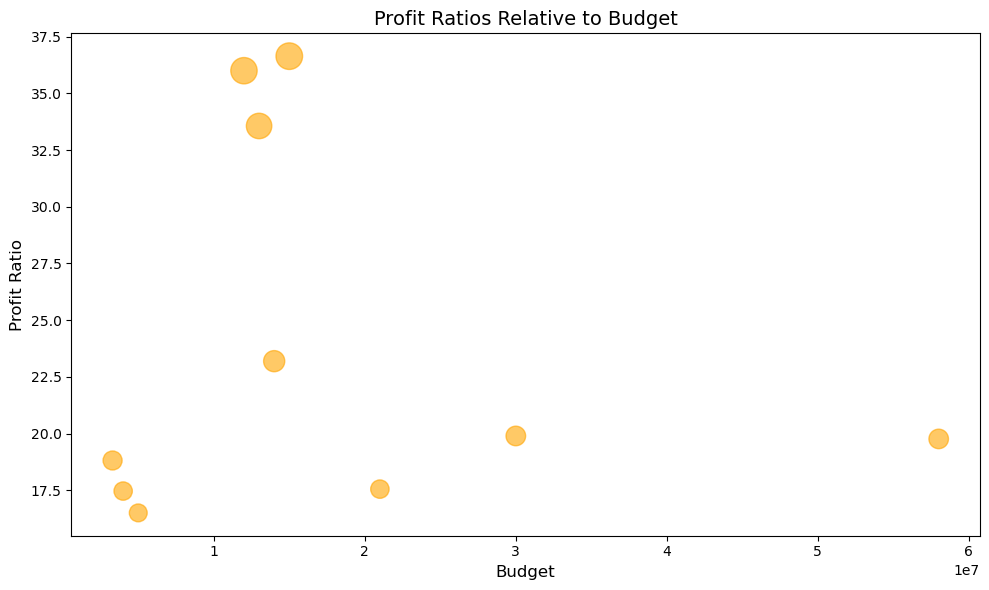

In [37]:
#This plot shows relationship between profit ratio and budget
plt.figure(figsize=(10, 6))
plt.scatter(high_profit["Budget"], high_profit["Profit_Ratio"], 
            s=high_profit["Profit_Ratio"] * 10, alpha=0.6, color="orange")
plt.xlabel("Budget", fontsize=12)
plt.ylabel("Profit Ratio", fontsize=12)
plt.title("Profit Ratios Relative to Budget", fontsize=14)
plt.tight_layout()
plt.show()

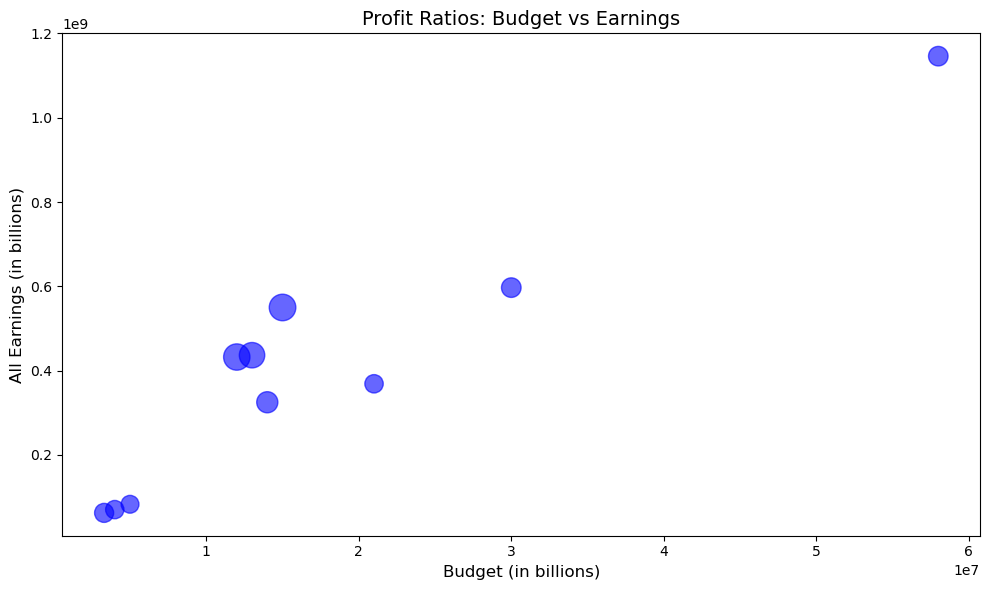

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(high_profit["Budget"], high_profit["All_Earnings"], 
            s=high_profit["Profit_Ratio"] * 10, color="blue", alpha=0.6)
plt.xlabel("Budget (in billions)", fontsize=12)
plt.ylabel("All Earnings (in billions)", fontsize=12)
plt.title("Profit Ratios: Budget vs Earnings", fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
#how votes correlate with rating
query = "SELECT IMDB.Rating, AVG(IMDB.TotalVotes) AS Avg_Votes FROM IMDB GROUP BY IMDB.Rating ORDER BY IMDB.Rating DESC;"
rates_votes=pd.read_sql(query, conn)
rates_votes

,Rating,Avg_Votes
0,8.8,1.609713e+06
1,8.6,1.075163e+06
2,8.5,4.922850e+05
3,8.4,1.148801e+06
4,8.3,5.963850e+05
5,8.2,4.415812e+05
6,8.1,5.398795e+05
7,8.0,4.209978e+05
8,7.9,2.629919e+05
9,7.8,3.254676e+05


In [23]:
#ratings for top 5 movies with higest overall earnings
query= "SELECT IMDB.Title, IMDB.Rating, earning.Domestic + earning.Worldwide AS Total_Earnings FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id ORDER BY Total_Earnings DESC LIMIT 5;"
top5_earning_to_rating=pd.read_sql(query, conn)
top5_earning_to_rating

,Title,Rating,Total_Earnings
0,Star Wars: The Force Awakens (2015),8.1,3.004886e+09
1,The Avengers (2012),8.1,2.142171e+09
2,Rogue One (2016),7.9,1.588235e+09
3,Captain America: Civil War (2016),7.9,1.561389e+09
4,The Dark Knight Rises (2012),8.4,1.533078e+09


In [24]:
#movie with the highest rating
query= "SELECT IMDB.Title, IMDB.Rating FROM IMDB WHERE IMDB.Rating = (SELECT MAX(Rating) FROM IMDB);"
highest_rating=pd.read_sql(query, conn)
highest_rating

,Title,Rating
0,Inception (2010),8.8


In [25]:
# top 5 rated low-budget movies 
query= "SELECT IMDB.Title, IMDB.Rating,IMDB.Budget FROM IMDB WHERE IMDB.Budget < 3000000 AND IMDB.Rating > 7.5 ORDER BY IMDB.Rating DESC LIMIT 5;"
low_budget_high_rating=pd.read_sql(query, conn)
low_budget_high_rating

,Title,Rating,Budget
0,Short Term 12 (2013),8.0,1000000.0
1,Hunt for the Wilderpeople (2016),7.9,2500000.0
2,Tyrannosaur (2011),7.6,1000000.0
3,What We Do in the Shadows (2014),7.6,1600000.0


In [48]:
#all tables together 
query= " SELECT IMDB.Movie_id, IMDB.Title, IMDB.Rating, IMDB.Runtime, IMDB.Budget, IMDB.TotalVotes,genre.genre,earning.Domestic, earning.Worldwide, (earning.Domestic + earning.Worldwide) AS Total_Earnings,(earning.Domestic + earning.Worldwide - IMDB.Budget) AS Profit FROM IMDB LEFT JOIN genre ON IMDB.Movie_id = genre.Movie_id LEFT JOIN earning ON IMDB.Movie_id = earning.Movie_id ORDER BY IMDB.Movie_id;"
all_together= pd.read_sql(query, conn)
all_together

,Movie_id,Title,Rating,Runtime,Budget,TotalVotes,genre,Domestic,Worldwide,Total_Earnings,Profit
0,10015,Disconnect (2012),7.6,115 min,10000000.0,65448,,1436900,1.436900e+06,2.873800e+06,-7.126200e+06
1,10015,Disconnect (2012),7.6,115 min,10000000.0,65448,Drama,1436900,1.436900e+06,2.873800e+06,-7.126200e+06
2,10015,Disconnect (2012),7.6,115 min,10000000.0,65448,Thriller,1436900,1.436900e+06,2.873800e+06,-7.126200e+06
3,10023,Wreck-It Ralph (2012),7.7,,165000000.0,295125,Adventure,189422889,4.712229e+08,6.606458e+08,4.956458e+08
4,10023,Wreck-It Ralph (2012),7.7,,165000000.0,295125,Animation,189422889,4.712229e+08,6.606458e+08,4.956458e+08
...,...,...,...,...,...,...,...,...,...,...,...
346,49518,Flipped (2010),7.7,,14000000.0,66461,Drama,1755212,1.755212e+06,3.510424e+06,-1.048958e+07
347,49518,Flipped (2010),7.7,,14000000.0,66461,Romance,1755212,1.755212e+06,3.510424e+06,-1.048958e+07
348,49590,Captain America: Civil War (2016),7.9,147 min,250000000.0,431555,Action,408084349,1.153304e+09,1.561389e+09,1.311389e+09
349,49590,Captain America: Civil War (2016),7.9,147 min,250000000.0,431555,Adventure,408084349,1.153304e+09,1.561389e+09,1.311389e+09


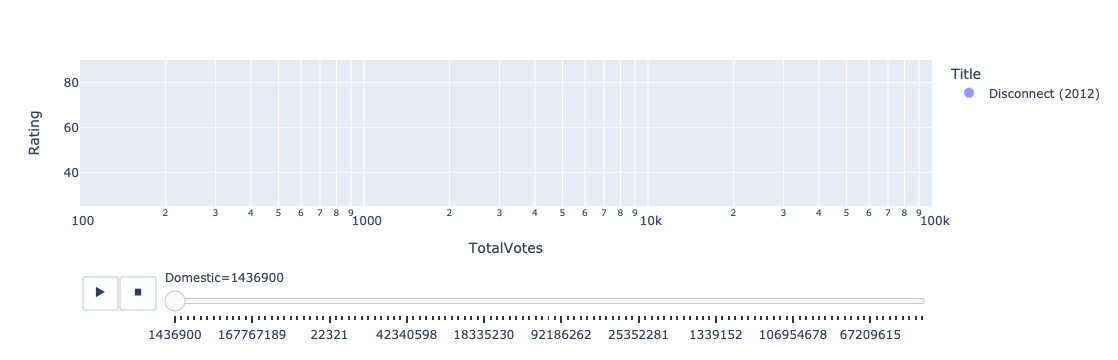

In [58]:
#This scatter plot does not work for the type of dataset I have 
fig = px.scatter(all_together, x="TotalVotes", y="Rating", animation_frame="Domestic", animation_group="Title",
          size="Total_Earnings", color="Title", hover_name= "Title",
          log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



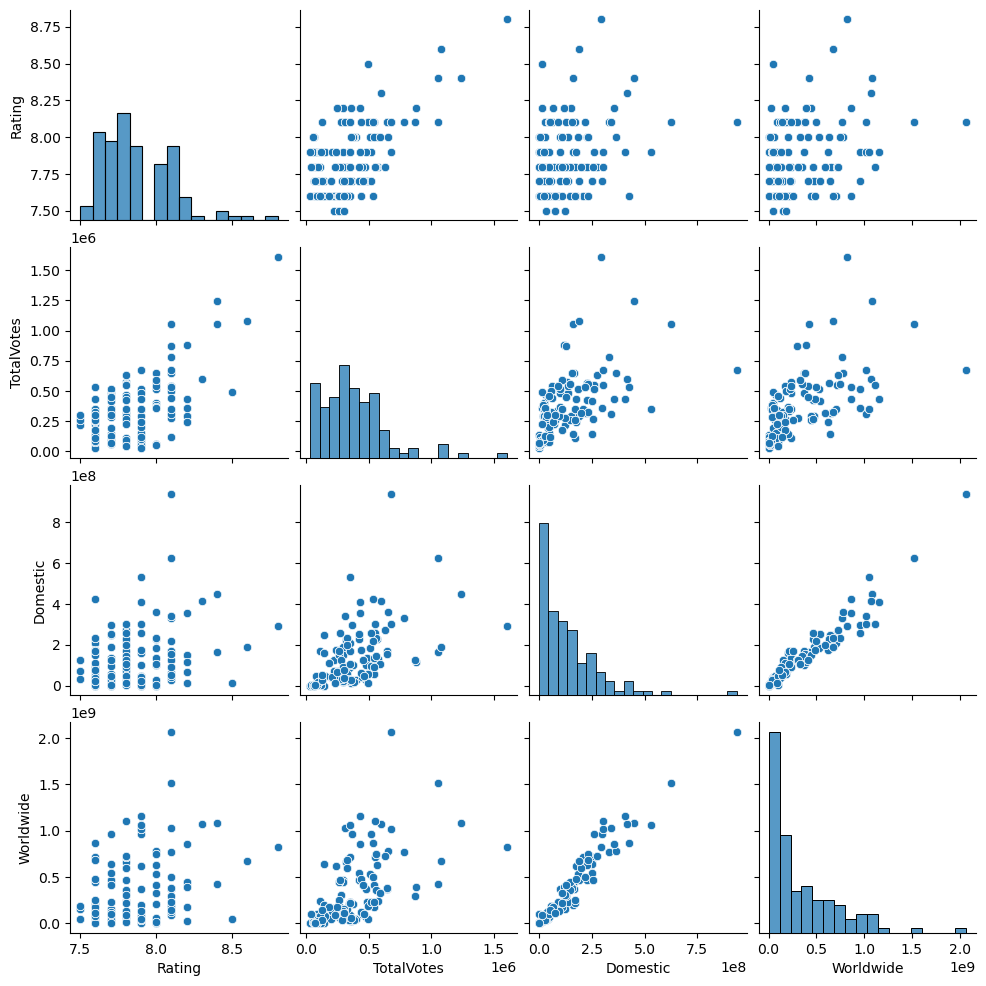

In [63]:
#with pairplot we can see relationships between multiple variables 
sns.pairplot(all_together[['Rating', 'TotalVotes', 'Domestic', 'Worldwide']])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



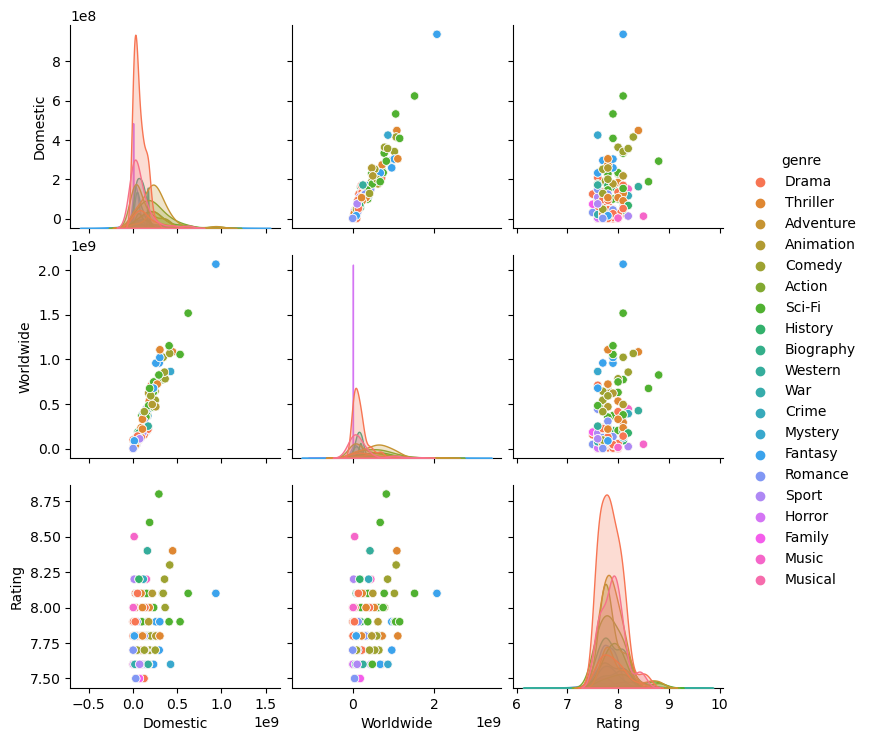

In [66]:
sns.pairplot(all_together, hue="genre", vars=[ "Domestic", "Worldwide", "Rating"])
plt.show()

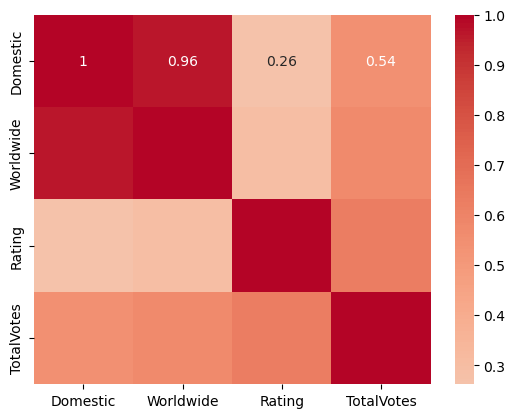

In [67]:
#Correlation matrix shows correlation between different variables in the dataset, brighter the color bigger the correlation
correlation_matrix = all_together[['Domestic', 'Worldwide', 'Rating', 'TotalVotes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()